In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from datetime import *
from imu_video_synch import *
from zurich_move_data_extraction import *
from utilities import *

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Video side Steps
# Convert the video to MP4 for Labelbox 
# Import the metadata from the video
# Extract the exact frame start movement/end movement using Labelbox 
# From these 2 frames: get cutting time
# Trim the video at the exact timestamp -> trimmed_video
# Extract the new number of frames of the trimmed video 
# Get the new start timestamp
# save the trimmed video as MP4 for labelbox 

In [3]:
# Change participant here:
participant_id = 'H008'
path, video_path, imu_path = get_participant_paths(participant_id)
print("Video Path:", video_path)
print("IMU Path:", imu_path)

Video Path: ../CreateStudy\H008\H008.MOV
IMU Path: ../CreateStudy\H008\H008.mat


In [4]:
# Import the metadata from the video
metadata = extract_metadata(video_path)
number_frames, fps, recording_time, creation_time, timestamps = metadata

In [5]:
print(number_frames, fps, recording_time, creation_time, timestamps)

25671 25 1026.84 2023-08-18T10:16:22.000000Z ['2023-08-18 10:16:22.000000' '2023-08-18 10:16:22.040000'
 '2023-08-18 10:16:22.080000' ... '2023-08-18 10:33:28.720000'
 '2023-08-18 10:33:28.760000' '2023-08-18 10:33:28.800000']


In [63]:
creation_time

'2023-08-16T10:39:58.000000Z'

In [7]:
# Use this to find the frames starting/ending the recording 
read_video_frames(video_path)

In [8]:
# Extract the exact frame start movement/end movement using OpenCV  
frame_start = 6315
frame_end = 30044

In [9]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration = get_trimmed_video_timestamps(frame_start, frame_end, timestamps)

In [10]:
video_start_timestamp, video_end_timestamp,trimmed_video_duration

(datetime.datetime(2023, 8, 23, 10, 42, 42, 600000),
 datetime.datetime(2023, 8, 23, 10, 58, 31, 760000),
 datetime.timedelta(seconds=949, microseconds=160000))

In [11]:
start_trimming_time, end_trimming_time = get_trimming_times(frame_start, frame_end)

In [64]:
# Trim the video at the exact timestamp -> trimmed_video
trimmed_video = trim_video(video_path, start_trimming_time, end_trimming_time, path)
print(f"Trimmed video saved as: {trimmed_video}")

Trimmed video saved as: ../CreateStudy\S002\trimmed_S002.MOV


In [15]:
# Read the trimmed video
read_video_frames(trimmed_video)

In [68]:
# Convert the trimmed video to MP4 for Labelbox 
converted_trimmed_video = convert_from_mov_to_mp4(trimmed_video, path)

KeyboardInterrupt: 

In [24]:
# Extract the new metadat of the trimmed video 
trimmed_number_frames,  trimmed_fps,  trimmed_recording_time, trimmed_creation_time,  trimmed_timestamps = extract_metadata(converted_trimmed_video)
print(trimmed_number_frames, trimmed_fps, trimmed_recording_time, trimmed_creation_time, trimmed_timestamps)

20304 25 812.16 None None


In [18]:
# Create MP4 videos for Labelbox
# Filenames
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
labelbox_video_LW_filename = participant_id + '_LW.mp4'
labelbox_video_RW_filename = participant_id + '_RW.mp4'

# Paths
trimmed_video_path = os.path.join(path, trimmed_video_filename)
labelbox_video_LW_path = os.path.join(path, labelbox_video_LW_filename)
labelbox_video_RW_path = os.path.join(path, labelbox_video_RW_filename)

# Copy videos
labelbox_video_LW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_LW_path)
labelbox_video_RW_filename = copy_video_with_new_name(trimmed_video_path, labelbox_video_RW_path)

Video copied: '../CreateStudy\H011\converted_trimmed_H011.MOV.mp4' -> '../CreateStudy\H011\H011_LW.mp4'
Video copied: '../CreateStudy\H011\converted_trimmed_H011.MOV.mp4' -> '../CreateStudy\H011\H011_RW.mp4'


In [25]:
# Extract the new metadat of the trimmed video 
trimmed_video_filename = 'converted_trimmed_' + participant_id + '.MOV.mp4'
trimmed_video_path = os.path.join(path, trimmed_video_filename)
number_frames_trimmed_video,  _,  _, _,  _ = extract_metadata(trimmed_video_path)
print(number_frames_trimmed_video)

20304


In [20]:
output_folder_LW = os.path.join(path, 'splitted_videos_LW')
output_folder_RW = os.path.join(path, 'splitted_videos_RW')
split_video_into_segments(labelbox_video_LW_path,output_folder_LW, trimmed_number_frames)
split_video_into_segments(labelbox_video_RW_path,output_folder_RW, trimmed_number_frames)

Segment 1 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_1.mp4
Segment 2 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_2.mp4
Segment 3 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_3.mp4
Segment 4 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_4.mp4
Segment 5 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_5.mp4
Segment 6 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_6.mp4
Segment 7 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_7.mp4
Segment 8 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_8.mp4
Segment 9 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_9.mp4
Segment 10 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_10.mp4
Segment 11 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_11.mp4
Segment 12 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_12.mp4
Segment 13 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_13.mp4
Segment 14 saved: ../CreateStudy\H011\splitted_videos_LW\H011_LW_14.mp4
Segment 15

In [26]:
# # IMU side Steps
# From the start timestamp and number of frame, extract the new IMU data
# Ensure 2 * trimmed_video_frames = number_sample_IMU
# The starting peak of acceleration should match the start of the new trimmed data 
# The end of the acceleration peak should match the end of the cut


In [27]:
# Define the sensor placements, sensor features, and dataframe features
sensor_placement = ['LW', 'chest', 'RW']
matlab_sensor_features = ['acc', 'gyro', 'quat', 'accHiG', 'magneto', 'press']
sensor_features = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'quat_0', 'quat_1', 'quat_2',
                   'quat_3', 'accHiG_x', 'accHiG_y', 'accHiG_z', 'magneto_x', 'magneto_y', 'magneto_z', 'press']
sensor_9DOF_features = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ',
                       'magnetoX', 'magnetoY', 'magnetoZ']
sensor_acc_features =  ['acc_x', 'acc_y', 'acc_z']


#Extract useful stuff
header = extract_header_data_from_mat_file(imu_path)
sampling_freq =get_sampling_freq(header)
time_array = extract_time_data_from_mat_file(imu_path)
recording_time = get_recording_time(time_array)
dfs = extract_sensors_data_from_mat_file(imu_path, sensor_placement, matlab_sensor_features, sensor_features)
#Usefull export to csv (for SimuLOOP script)
#export_to_csv(file_path, dfs, sensor_placement, matlab_sensor_features, sensor_features)
acc_LW = dfs['LW'][['acc_x', 'acc_y', 'acc_z']]
acc_RW = dfs['RW'][['acc_x', 'acc_y', 'acc_z']]
gyro_LW = dfs['LW'][['gyro_x', 'gyro_y', 'gyro_z']]
gyro_RW = dfs['RW'][['gyro_x', 'gyro_y', 'gyro_z']]
mag_LW = dfs['LW'][['magneto_x', 'magneto_y', 'magneto_z']]
quat_sensor_LW = dfs['LW'][['quat_0', 'quat_1', 'quat_2','quat_3']]
LW_data = dfs['LW']
RW_data = dfs['RW']
chest_data = dfs['chest']

In [28]:
header

,durationStr,freq,start,startStr,stop,stopStr,tsErrorSensorIDs
0,1 6 m   4 2 s ,50.0,1.692354e+09,2 0 2 3 / 0 8 / 1 8   1 0 : 1 4 : 5 2 . 0 0 0 ,1.692355e+09,2 0 2 3 / 0 8 / 1 8   1 0 : 3 1 : 3 4 . 0 0 0 ,S - 2 4 - A - 1 3 1 5 5   ( R i g h t W r i s ...


In [29]:
IMU_start_timestamp, IMU_end_timestamp = get_datetime_timestamp(header)

2023-08-18 10:14:52.000000 2023-08-18 10:31:34.000000


In [30]:
IMU_start_timestamp

datetime.datetime(2023, 8, 18, 10, 14, 52)

In [31]:
timestamps_array = create_timestamps(IMU_start_timestamp, IMU_end_timestamp, 50)

In [32]:
timestamps_array

,timestamp
0,2023-08-18 10:14:52.000
1,2023-08-18 10:14:52.020
2,2023-08-18 10:14:52.040
3,2023-08-18 10:14:52.060
4,2023-08-18 10:14:52.080
...,...
50096,2023-08-18 10:31:33.920
50097,2023-08-18 10:31:33.940
50098,2023-08-18 10:31:33.960
50099,2023-08-18 10:31:33.980


In [33]:
RW_data

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,-0.161908,-0.040001,-1.904277,-1.227629,1.372845,1.946722,0.574338,-0.088902,-0.795174,-0.173003,-0.835201,0.503648,-1.288252,389.999846,295.199803,-181.199781,1006.570000
1,-0.178048,-0.004263,-1.835692,-1.003440,0.801120,1.927996,0.573150,-0.089424,-0.796069,-0.172563,-0.801114,0.434410,-1.317751,390.000041,295.200053,-181.200059,1006.570000
2,-0.175456,0.000559,-1.940948,-1.234683,1.472218,2.063878,0.572106,-0.089909,-0.796856,-0.172140,-0.798587,0.405235,-1.342051,389.999988,295.199985,-181.199984,1006.570000
3,-0.203244,-0.015273,-2.016187,-0.991728,2.376316,2.044759,0.571002,-0.090382,-0.797688,-0.171702,-0.837223,0.442557,-1.353957,390.000007,295.200007,-181.200007,1006.570000
4,-0.186692,0.011224,-1.956484,-1.440918,1.790417,2.008804,0.569947,-0.090835,-0.798484,-0.171267,-0.821456,0.457622,-1.281766,389.999982,295.199987,-181.199990,1006.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,-0.162367,-0.550894,-1.848946,1.051403,1.490198,-0.217186,0.155524,-0.985761,-0.041871,0.048312,-0.809956,0.091239,-1.229947,419.997435,93.599679,-89.995831,1006.449984
50097,-0.165851,-0.544434,-1.839106,1.077629,0.394771,-1.797375,0.155687,-0.985738,-0.042038,0.048126,-0.779340,0.119542,-1.279568,420.000687,93.600086,-90.001117,1006.450004
50098,-0.152448,-0.560789,-1.823922,0.863105,-0.689389,-2.622604,0.155838,-0.985698,-0.042429,0.048106,-0.765990,0.129866,-1.246480,419.999816,93.599977,-89.999701,1006.449999
50099,-0.170141,-0.575687,-1.832585,0.371533,-1.537759,-2.769520,0.155915,-0.985657,-0.042930,0.048248,-0.723255,0.112348,-1.230247,420.000050,93.600006,-90.000080,1006.450000


In [34]:
# Add timestamps to raw data
LW_data = pd.concat([timestamps_array, LW_data], axis=1)
RW_data = pd.concat([timestamps_array, RW_data], axis=1)
chest_data = pd.concat([timestamps_array, chest_data], axis=1)

In [35]:
LW_data

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,2023-08-18 10:14:52.000,-0.226433,0.084003,-2.316204,0.914904,3.062469,2.751414,0.228623,-0.659935,-0.713255,0.059029,-0.736880,0.090861,-2.387871,432.000000,24.578788,-57.570303,1011.410212
1,2023-08-18 10:14:52.020,-0.151053,0.015376,-2.344433,0.368468,9.720998,3.143017,0.227999,-0.660447,-0.712993,0.058880,-0.729536,0.041665,-2.334114,432.000000,24.605686,-57.607961,1011.409943
2,2023-08-18 10:14:52.040,-0.077424,0.064510,-2.184025,-0.491796,9.193205,3.444320,0.227279,-0.660960,-0.712761,0.058729,-0.735223,0.053858,-2.343143,432.000000,24.598476,-57.597866,1011.410015
3,2023-08-18 10:14:52.060,0.019425,0.119083,-2.120647,-0.168728,3.783008,3.441884,0.226531,-0.661474,-0.712536,0.058554,-0.718794,0.034566,-2.342099,432.000000,24.600409,-57.600572,1011.409996
4,2023-08-18 10:14:52.080,-0.014503,0.153102,-1.891752,0.261105,0.437632,2.952936,0.225685,-0.661976,-0.712348,0.058439,-0.681883,0.003612,-2.337236,432.000000,24.599890,-57.599847,1011.410001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,2023-08-18 10:31:33.920,-0.717353,0.534570,-1.798356,-1.817920,3.180510,2.939779,-0.170083,-0.953638,-0.198179,0.149572,-0.883700,0.298530,-2.118637,384.598851,-58.212637,-51.606893,1011.300019
50097,2023-08-18 10:31:33.940,-0.722876,0.509745,-1.820227,-3.063334,2.702195,4.237775,-0.170516,-0.953767,-0.197711,0.148876,-0.958700,0.384125,-2.115672,384.604289,-58.152824,-51.574268,1011.299929
50098,2023-08-18 10:31:33.960,-0.700788,0.557229,-1.846153,-5.036645,2.264388,5.160704,-0.171268,-0.953872,-0.197095,0.148150,-0.985850,0.343965,-2.158771,384.583989,-58.376125,-51.696068,1011.300267
50099,2023-08-18 10:31:33.980,-0.688705,0.597119,-1.830602,-6.159149,1.447398,5.344422,-0.172324,-0.953933,-0.196391,0.147470,-0.939305,0.277568,-2.115033,384.659775,-57.542478,-51.241352,1011.299004


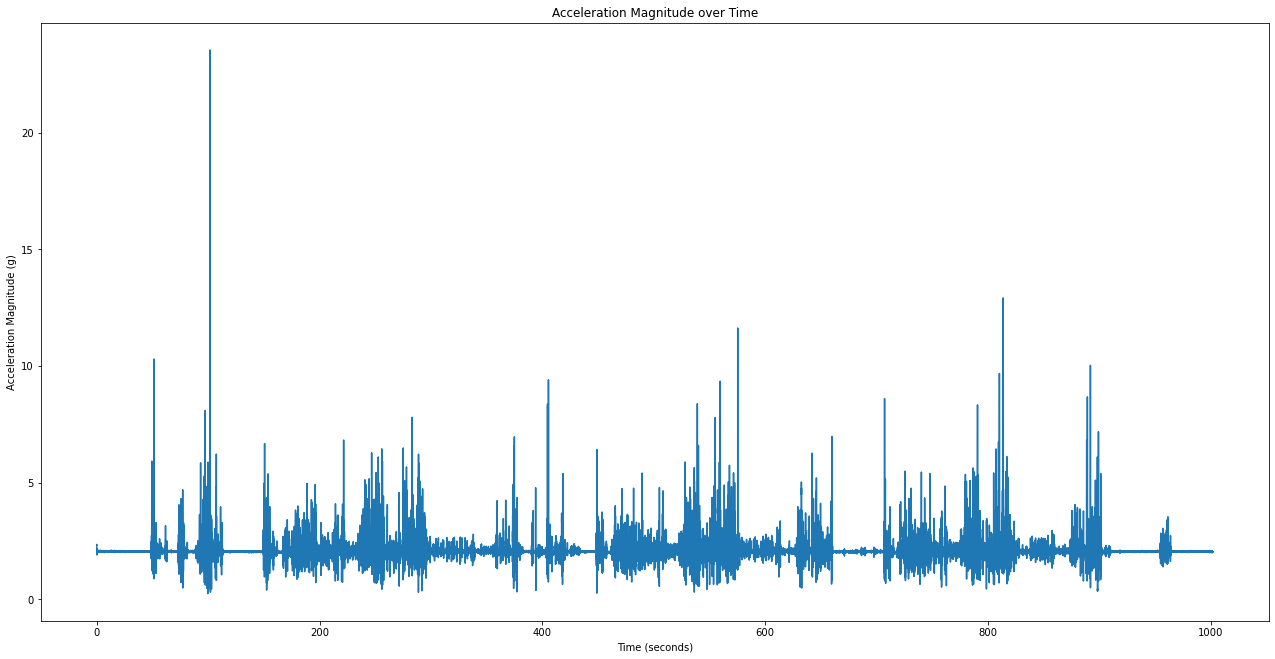

In [36]:
plot_acceleration_magnitude(LW_data,50)

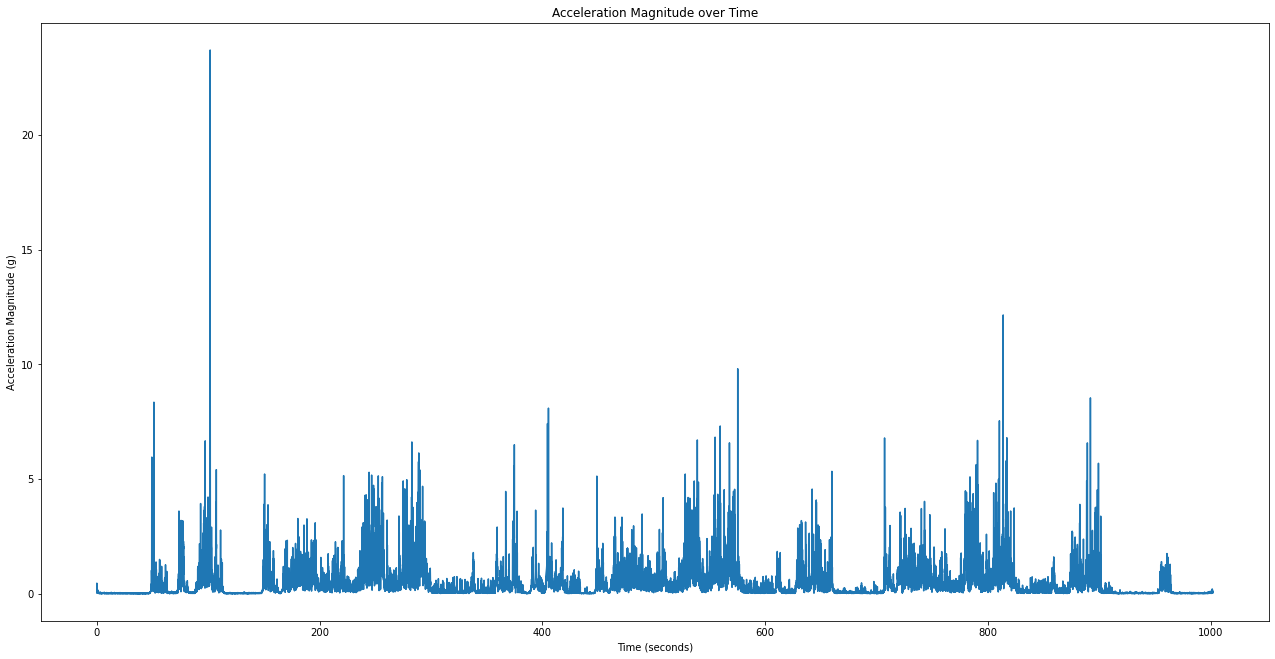

In [37]:
plot_acceleration_magnitude(filter_gravity(LW_data),50)

In [38]:
filtered_LW_data = filter_gravity(LW_data)

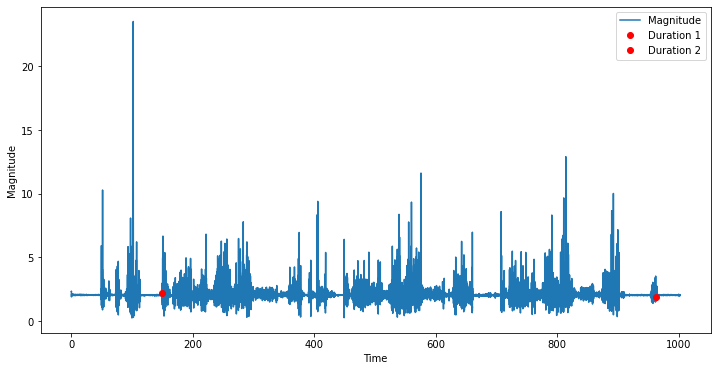

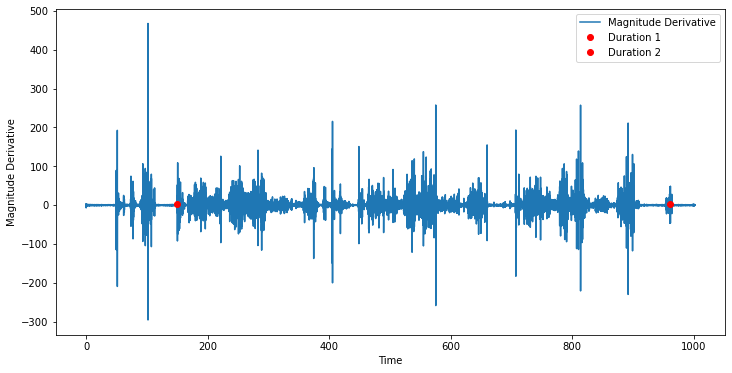

Duration 1: 149.5
Duration 2: 961.64
Number of Samples: 40608
Number of Video Frames: 20304
Conditions ok


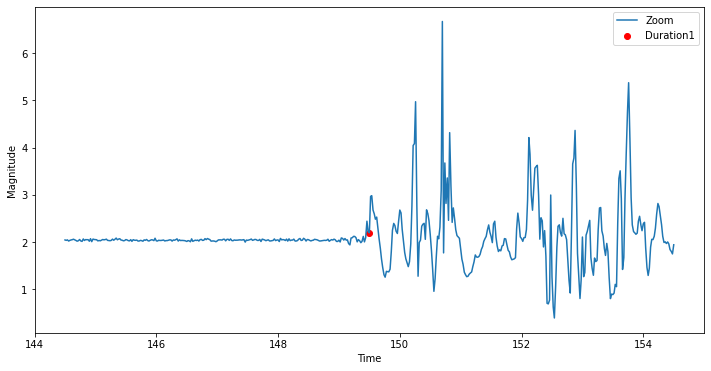

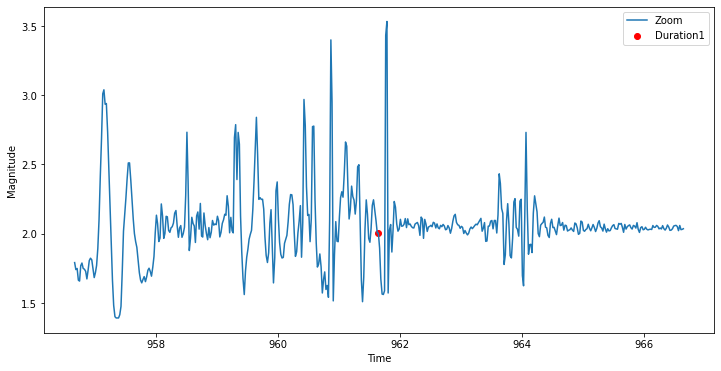

In [49]:
duration1 = 149.5
LW_data,  duration1, duration2 = plot_acceleration_with_timepoints(LW_data, duration1, trimmed_number_frames, trimmed_recording_time)
#LW_data, duration1, duration2 = plot_acceleration_with_timepoints(filtered_LW_data, duration1, trimmed_number_frames, trimmed_recording_time)

In [50]:
LW_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
0,0 days 00:00:00,2023-08-18 10:14:52.000,-0.226433,0.084003,-2.316204,0.914904,3.062469,2.751414,0.228623,-0.659935,-0.713255,0.059029,-0.736880,0.090861,-2.387871,432.000000,24.578788,-57.570303,1011.410212
1,0 days 00:00:00.020000,2023-08-18 10:14:52.020,-0.151053,0.015376,-2.344433,0.368468,9.720998,3.143017,0.227999,-0.660447,-0.712993,0.058880,-0.729536,0.041665,-2.334114,432.000000,24.605686,-57.607961,1011.409943
2,0 days 00:00:00.040000,2023-08-18 10:14:52.040,-0.077424,0.064510,-2.184025,-0.491796,9.193205,3.444320,0.227279,-0.660960,-0.712761,0.058729,-0.735223,0.053858,-2.343143,432.000000,24.598476,-57.597866,1011.410015
3,0 days 00:00:00.060000,2023-08-18 10:14:52.060,0.019425,0.119083,-2.120647,-0.168728,3.783008,3.441884,0.226531,-0.661474,-0.712536,0.058554,-0.718794,0.034566,-2.342099,432.000000,24.600409,-57.600572,1011.409996
4,0 days 00:00:00.080000,2023-08-18 10:14:52.080,-0.014503,0.153102,-1.891752,0.261105,0.437632,2.952936,0.225685,-0.661976,-0.712348,0.058439,-0.681883,0.003612,-2.337236,432.000000,24.599890,-57.599847,1011.410001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50096,0 days 00:16:41.919000,2023-08-18 10:31:33.920,-0.717353,0.534570,-1.798356,-1.817920,3.180510,2.939779,-0.170083,-0.953638,-0.198179,0.149572,-0.883700,0.298530,-2.118637,384.598851,-58.212637,-51.606893,1011.300019
50097,0 days 00:16:41.940000,2023-08-18 10:31:33.940,-0.722876,0.509745,-1.820227,-3.063334,2.702195,4.237775,-0.170516,-0.953767,-0.197711,0.148876,-0.958700,0.384125,-2.115672,384.604289,-58.152824,-51.574268,1011.299929
50098,0 days 00:16:41.960000,2023-08-18 10:31:33.960,-0.700788,0.557229,-1.846153,-5.036645,2.264388,5.160704,-0.171268,-0.953872,-0.197095,0.148150,-0.985850,0.343965,-2.158771,384.583989,-58.376125,-51.696068,1011.300267
50099,0 days 00:16:41.980000,2023-08-18 10:31:33.980,-0.688705,0.597119,-1.830602,-6.159149,1.447398,5.344422,-0.172324,-0.953933,-0.196391,0.147470,-0.939305,0.277568,-2.115033,384.659775,-57.542478,-51.241352,1011.299004


In [51]:
LW_trimmed_data = trim_data(LW_data, duration1, duration2)
RW_trimmed_data = trim_data(RW_data, duration1, duration2)
chest_trimmed_data = trim_data(chest_data, duration1, duration2)

In [52]:
LW_trimmed_data

,time,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,quat_0,quat_1,quat_2,quat_3,accHiG_x,accHiG_y,accHiG_z,magneto_x,magneto_y,magneto_z,press
7475,0 days 00:02:29.500000,2023-08-18 10:17:21.500,-0.805988,0.908948,-1.830405,-36.668435,47.762214,10.557557,-0.157826,-0.980642,-0.016841,0.114637,-0.965180,0.270480,-2.344784,388.797031,-76.798100,-49.200396,1011.42
7476,0 days 00:02:29.520000,2023-08-18 10:17:21.520,-1.689819,1.360351,-2.023361,-60.610519,39.275974,24.662346,-0.165117,-0.980370,-0.015426,0.106717,-1.026143,0.480348,-2.254167,388.811045,-76.807069,-49.198527,1011.42
7477,0 days 00:02:29.539000,2023-08-18 10:17:21.540,-0.934776,2.201404,-1.780164,-91.077476,60.040074,70.122648,-0.184144,-0.978321,-0.008822,0.094257,-1.013402,0.482351,-2.191430,388.758902,-76.773697,-49.205480,1011.42
7478,0 days 00:02:29.560000,2023-08-18 10:17:21.560,-0.934787,1.629784,-1.907386,-55.409789,60.220841,92.362288,-0.197357,-0.976861,0.002906,0.082421,-1.213664,0.737668,-2.250757,388.952907,-76.897861,-49.179612,1011.42
7479,0 days 00:02:29.580000,2023-08-18 10:17:21.580,-0.798698,1.689918,-1.803237,-43.963643,55.398648,121.993043,-0.207609,-0.975589,0.019050,0.068995,-1.086517,1.166421,-2.058704,388.231045,-76.435869,-49.275861,1011.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48078,0 days 00:16:01.559000,2023-08-18 10:30:53.560,-0.289150,0.944278,-2.016038,54.021546,-17.271380,-24.955801,-0.203620,-0.971869,-0.118287,0.004225,-0.745875,0.611347,-2.087578,416.621527,-47.669125,-39.707933,1011.28
48079,0 days 00:16:01.580000,2023-08-18 10:30:53.580,-0.309690,0.900606,-1.945384,54.044579,-12.856444,-24.128818,-0.194938,-0.973178,-0.121848,0.008754,-0.736150,0.507123,-2.151155,408.503090,-56.412056,-42.518161,1011.28
48080,0 days 00:16:01.600000,2023-08-18 10:30:53.600,-0.363600,0.734325,-1.927996,47.703991,-11.147830,-22.467745,-0.186610,-0.974331,-0.125265,0.012783,-0.716794,0.478464,-2.173555,397.979960,-67.744658,-46.160783,1011.28
48081,0 days 00:16:01.620000,2023-08-18 10:30:53.620,-0.365792,0.768791,-1.817029,40.379725,-11.514929,-23.945810,-0.179515,-0.975147,-0.128806,0.016519,-0.770428,0.490267,-2.156125,400.034010,-65.532604,-45.449766,1011.28


In [57]:
# Save everything in the correct folder
save_data(path, participant_id, frame_start, frame_end, duration1, LW_trimmed_data, RW_trimmed_data, chest_trimmed_data)

The integers have been saved to the file: '../CreateStudy\H008\H008_video_parameters.txt'
Video parameters saved.
Trimmed data for LW saved to: ../CreateStudy\H008\trimmed_LW_data.csv
Trimmed data for RW saved to: ../CreateStudy\H008\trimmed_RW_data.csv
Trimmed data for chest saved to: ../CreateStudy\H008\trimmed_chest_data.csv
